<a href="https://colab.research.google.com/github/ubeL13/signs/blob/main/signs_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import cv2
import numpy as np
from skimage.measure import label, regionprops
from matplotlib import pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
import os
import zipfile
import itertools
import random
import shutil
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import models, transforms
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.stats import skew, kurtosis
import seaborn as sns


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir('/content/drive/MyDrive')

In [ ]:
zip_path = '/content/drive/MyDrive/kursach.zip'
extract_path = '/content/drive/MyDrive/kursach/'
data_folder = os.path.join(extract_path, 'data')
processed_data_folder = os.path.join(extract_path, 'processed_data')
os.makedirs(processed_data_folder, exist_ok=True)

In [ ]:
with zipfile.ZipFile('kursach.zip', 'r') as zip_ref:
    zip_ref.extractall('kursach')

data_folder = os.path.join(extract_path, 'data')

In [ ]:
# Получение списка всех изображений
image_files = []
for root, _, files in os.walk(data_folder):
    for file in files:
        if file.lower().endswith(('png', 'jpg', 'jpeg', 'bmp')):
            image_files.append(os.path.join(root, file))

features = []

print(f"Found {len(image_files)} images.")

Found 63 images.


Processing: /content/drive/MyDrive/kursach/data/person 1/sign_1.jpg


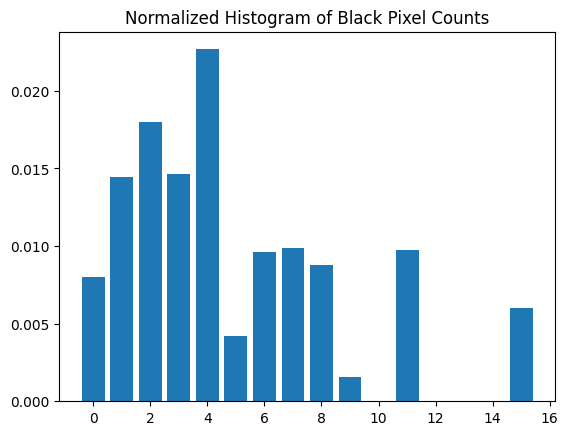

Processed image saved to: /content/drive/MyDrive/kursach/processed_data/person 1/person 1_sign_1.jpg
Processing: /content/drive/MyDrive/kursach/data/person 1/sign_2.jpg


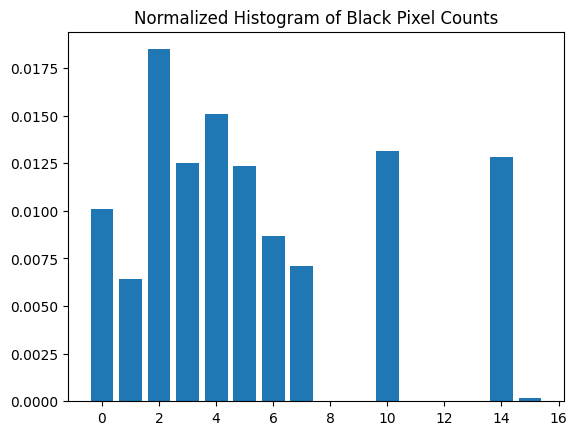

Processed image saved to: /content/drive/MyDrive/kursach/processed_data/person 1/person 1_sign_2.jpg
Processing: /content/drive/MyDrive/kursach/data/person 1/sign_3.jpg


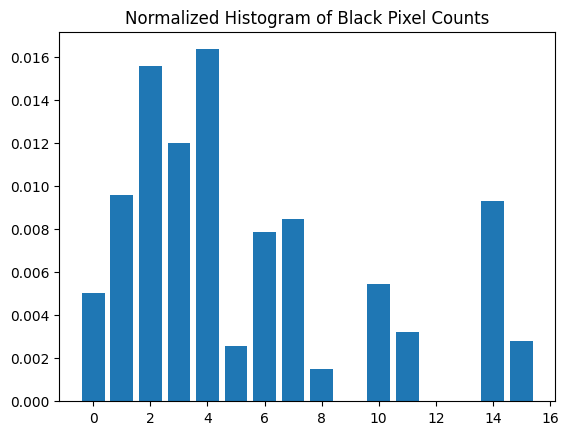

Processed image saved to: /content/drive/MyDrive/kursach/processed_data/person 1/person 1_sign_3.jpg
Processing: /content/drive/MyDrive/kursach/data/person 1/sign_5.jpg


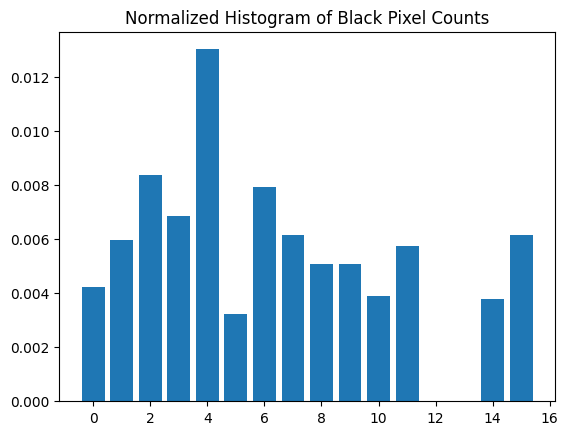

Processed image saved to: /content/drive/MyDrive/kursach/processed_data/person 1/person 1_sign_5.jpg
Processing: /content/drive/MyDrive/kursach/data/person 1/sign_4.jpg


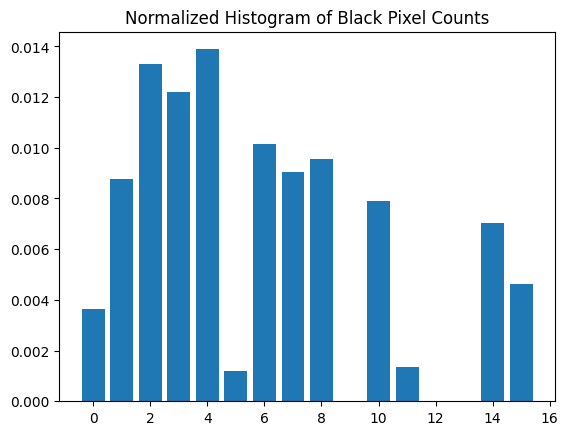

Processed image saved to: /content/drive/MyDrive/kursach/processed_data/person 1/person 1_sign_4.jpg
Processing: /content/drive/MyDrive/kursach/data/person 10/sign_2.jpg


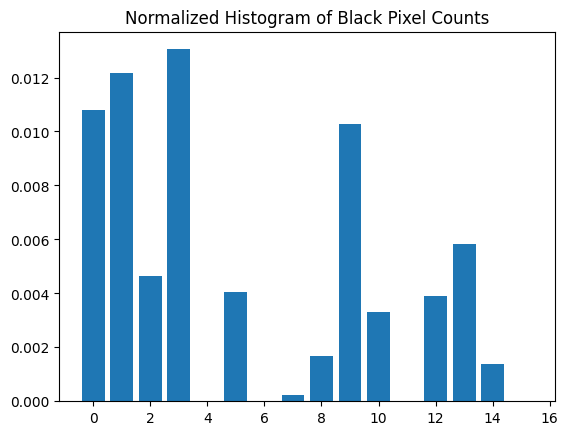

Processed image saved to: /content/drive/MyDrive/kursach/processed_data/person 10/person 10_sign_2.jpg
Processing: /content/drive/MyDrive/kursach/data/person 10/sign_1.jpg


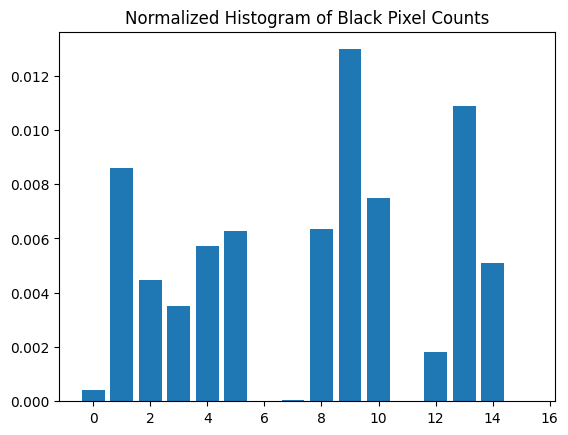

Processed image saved to: /content/drive/MyDrive/kursach/processed_data/person 10/person 10_sign_1.jpg
Processing: /content/drive/MyDrive/kursach/data/person 10/sign_5.jpg


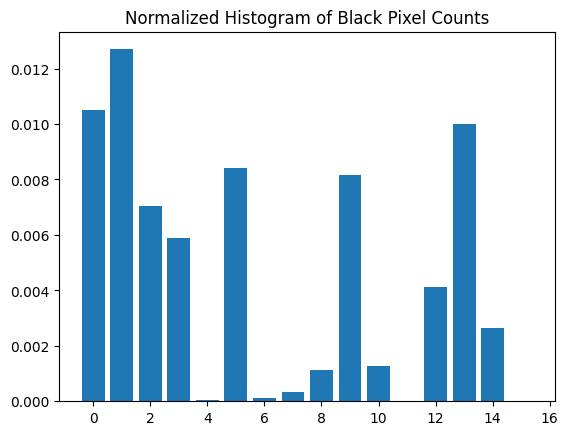

Processed image saved to: /content/drive/MyDrive/kursach/processed_data/person 10/person 10_sign_5.jpg
Processing: /content/drive/MyDrive/kursach/data/person 10/sign_4.jpg


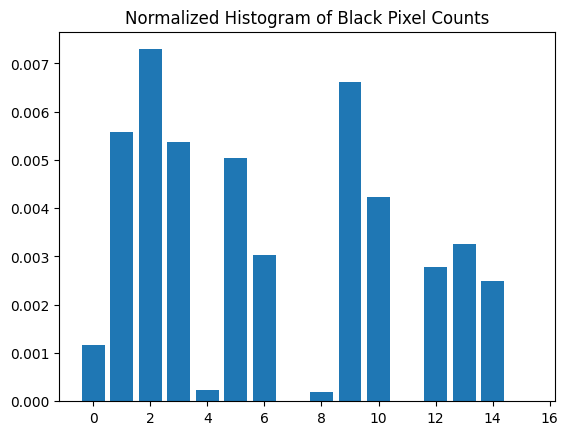

Processed image saved to: /content/drive/MyDrive/kursach/processed_data/person 10/person 10_sign_4.jpg
Processing: /content/drive/MyDrive/kursach/data/person 10/sign_3.jpg


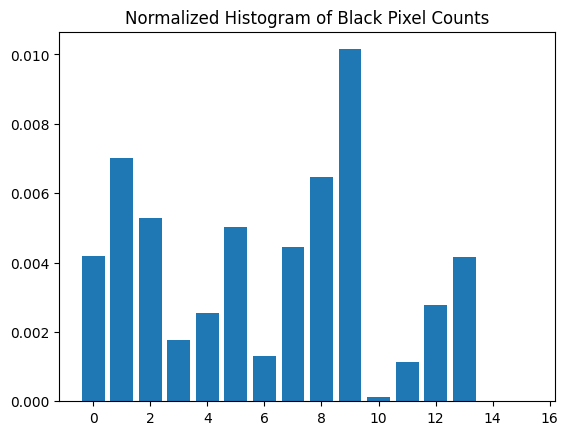

Processed image saved to: /content/drive/MyDrive/kursach/processed_data/person 10/person 10_sign_3.jpg
Processing: /content/drive/MyDrive/kursach/data/person 11/sign_1.jpg


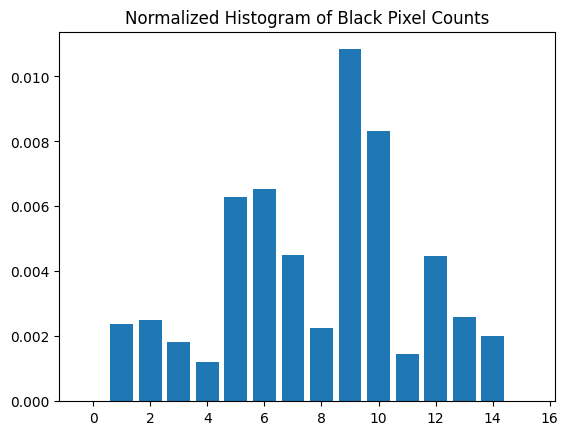

Processed image saved to: /content/drive/MyDrive/kursach/processed_data/person 11/person 11_sign_1.jpg
Processing: /content/drive/MyDrive/kursach/data/person 11/sign_3.jpg


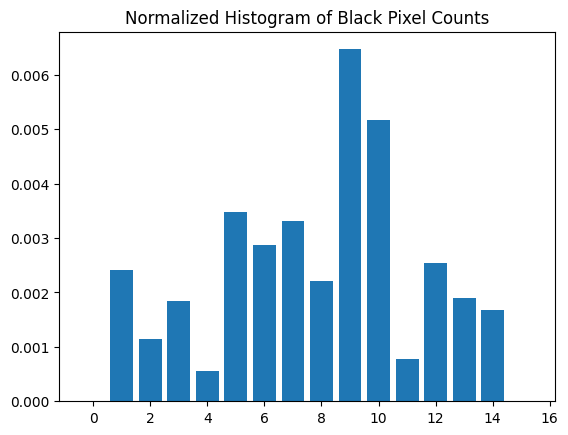

Processed image saved to: /content/drive/MyDrive/kursach/processed_data/person 11/person 11_sign_3.jpg
Processing: /content/drive/MyDrive/kursach/data/person 11/sign_4.jpg


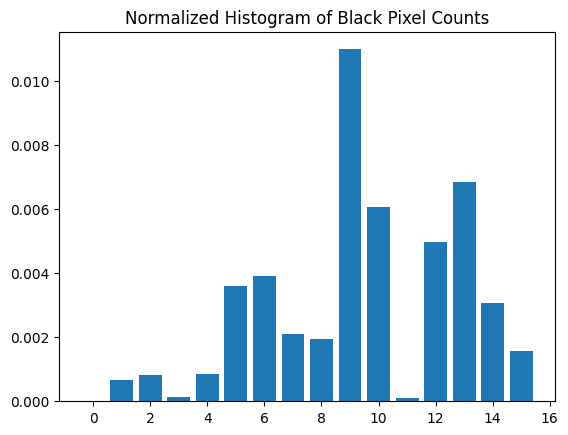

Processed image saved to: /content/drive/MyDrive/kursach/processed_data/person 11/person 11_sign_4.jpg
Processing: /content/drive/MyDrive/kursach/data/person 11/sign_2.jpg


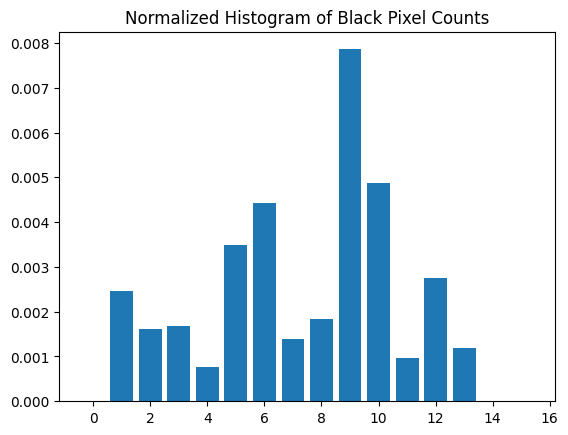

Processed image saved to: /content/drive/MyDrive/kursach/processed_data/person 11/person 11_sign_2.jpg
Processing: /content/drive/MyDrive/kursach/data/person 11/sign_5.jpg


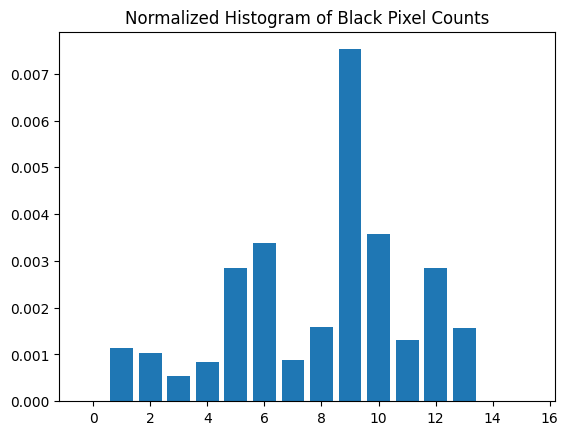

Processed image saved to: /content/drive/MyDrive/kursach/processed_data/person 11/person 11_sign_5.jpg
Processing: /content/drive/MyDrive/kursach/data/person 12/sign_2.jpg


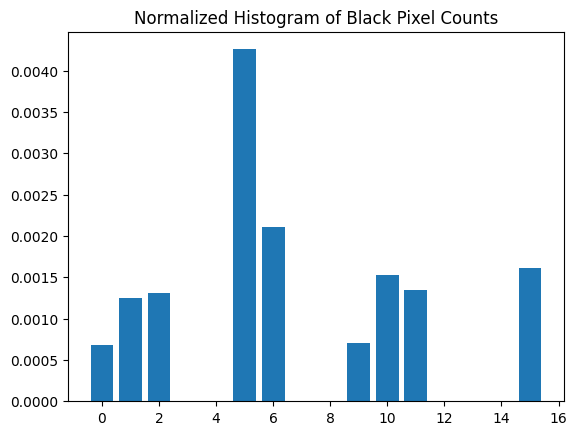

Processed image saved to: /content/drive/MyDrive/kursach/processed_data/person 12/person 12_sign_2.jpg
Processing: /content/drive/MyDrive/kursach/data/person 12/sign_1.jpg


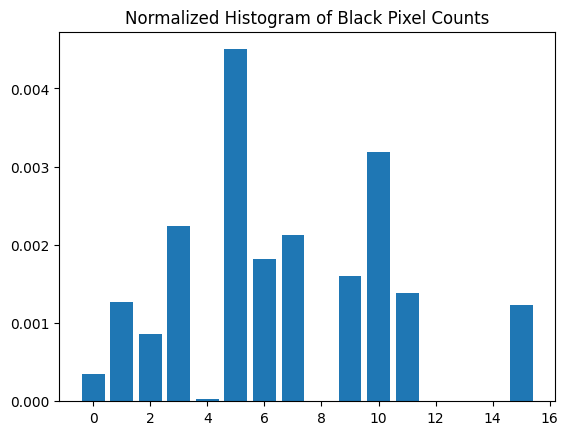

Processed image saved to: /content/drive/MyDrive/kursach/processed_data/person 12/person 12_sign_1.jpg
Processing: /content/drive/MyDrive/kursach/data/person 12/sign_3.jpg


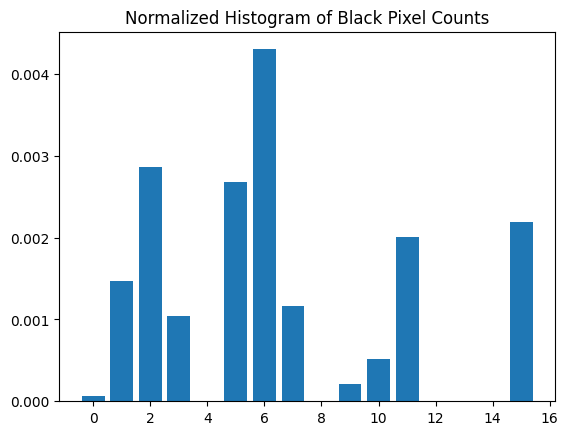

Processed image saved to: /content/drive/MyDrive/kursach/processed_data/person 12/person 12_sign_3.jpg
Processing: /content/drive/MyDrive/kursach/data/person 12/sign_4.jpg


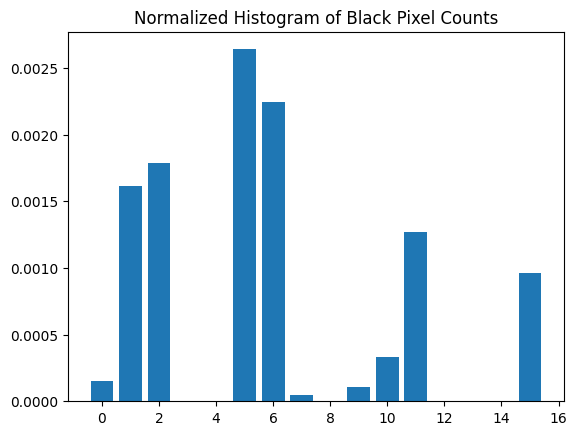

Processed image saved to: /content/drive/MyDrive/kursach/processed_data/person 12/person 12_sign_4.jpg
Processing: /content/drive/MyDrive/kursach/data/person 12/sign_5.jpg


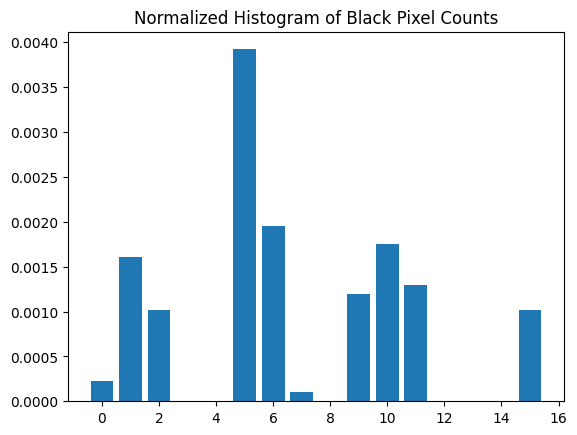

Processed image saved to: /content/drive/MyDrive/kursach/processed_data/person 12/person 12_sign_5.jpg
Processing: /content/drive/MyDrive/kursach/data/person 13/sign_1.jpg


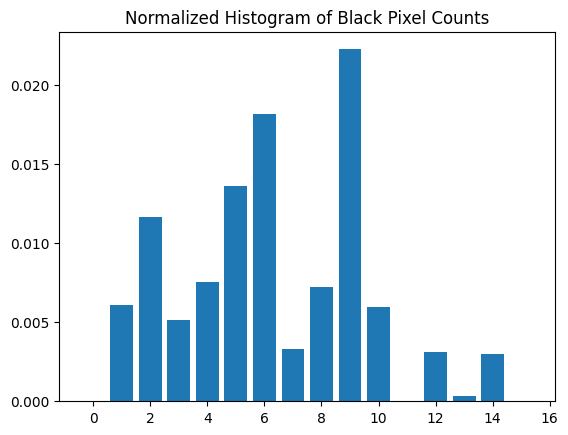

Processed image saved to: /content/drive/MyDrive/kursach/processed_data/person 13/person 13_sign_1.jpg
Processing: /content/drive/MyDrive/kursach/data/person 13/sign_2.jpg


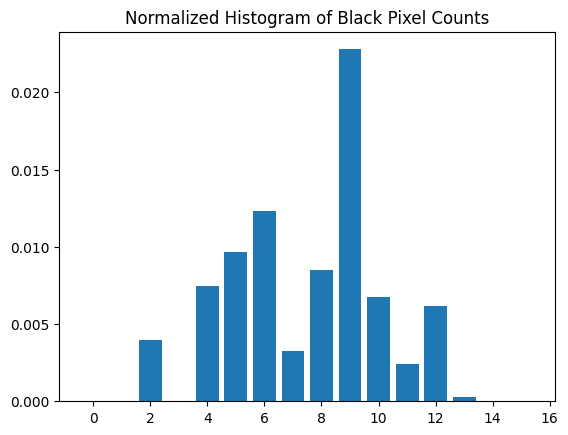

Processed image saved to: /content/drive/MyDrive/kursach/processed_data/person 13/person 13_sign_2.jpg
Processing: /content/drive/MyDrive/kursach/data/person 13/sign_3.jpg


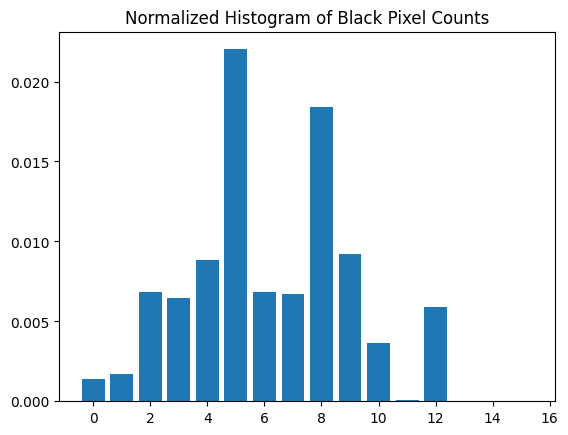

Processed image saved to: /content/drive/MyDrive/kursach/processed_data/person 13/person 13_sign_3.jpg
Processing: /content/drive/MyDrive/kursach/data/person 13/sign_5.jpg


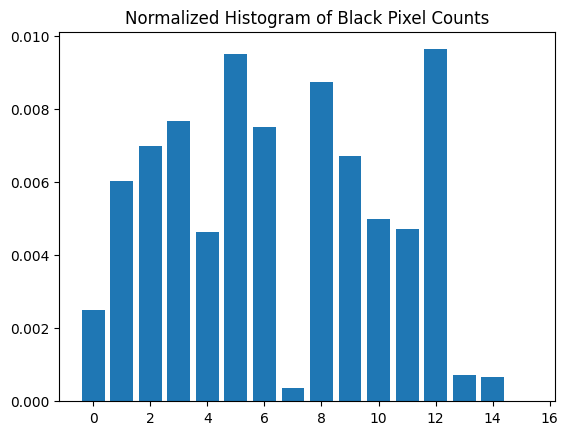

Processed image saved to: /content/drive/MyDrive/kursach/processed_data/person 13/person 13_sign_5.jpg
Processing: /content/drive/MyDrive/kursach/data/person 13/sign_4.jpg


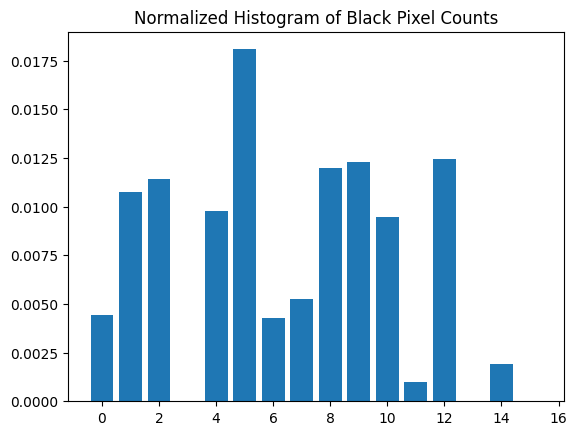

Processed image saved to: /content/drive/MyDrive/kursach/processed_data/person 13/person 13_sign_4.jpg
Processing: /content/drive/MyDrive/kursach/data/person 2/sign_2.jpg


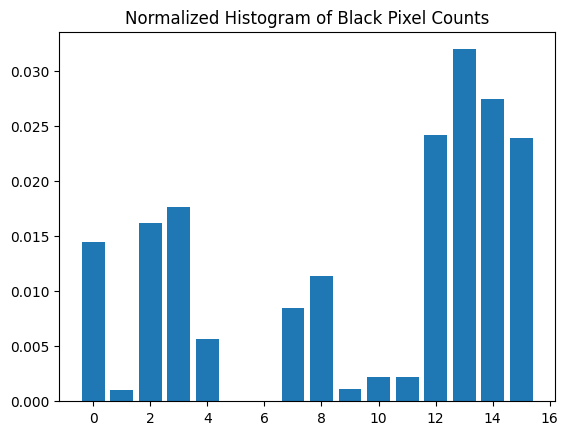

Processed image saved to: /content/drive/MyDrive/kursach/processed_data/person 2/person 2_sign_2.jpg
Processing: /content/drive/MyDrive/kursach/data/person 2/sign_1.jpg


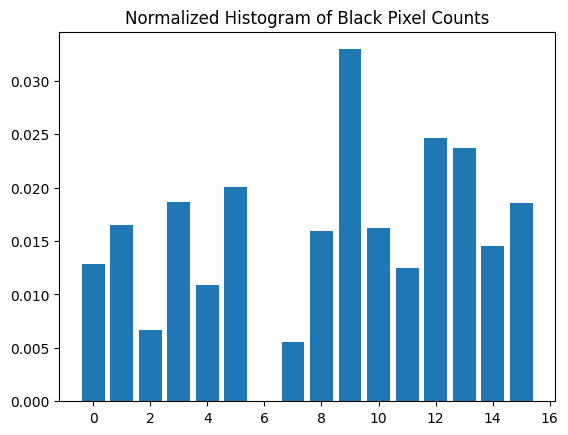

Processed image saved to: /content/drive/MyDrive/kursach/processed_data/person 2/person 2_sign_1.jpg
Processing: /content/drive/MyDrive/kursach/data/person 2/sign_4.jpg


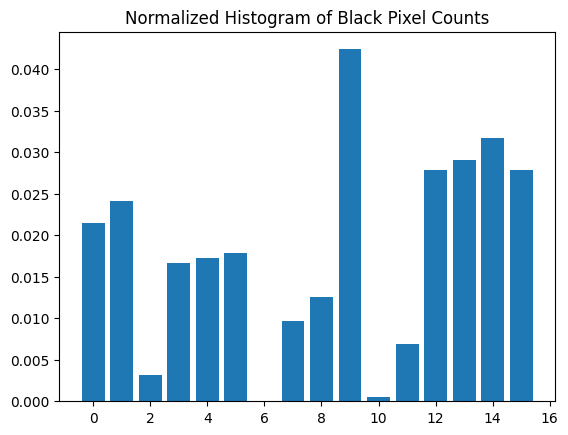

Processed image saved to: /content/drive/MyDrive/kursach/processed_data/person 2/person 2_sign_4.jpg
Processing: /content/drive/MyDrive/kursach/data/person 2/sign_3.jpg


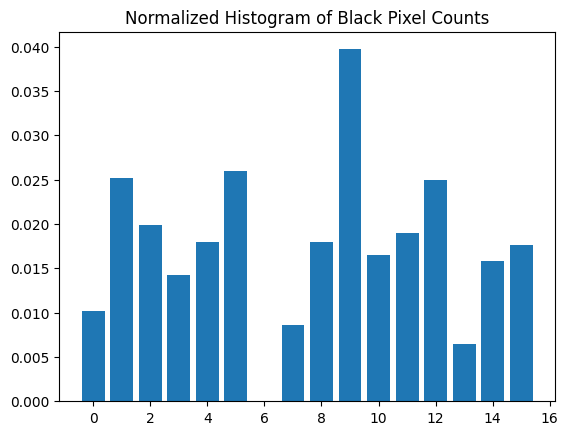

Processed image saved to: /content/drive/MyDrive/kursach/processed_data/person 2/person 2_sign_3.jpg
Processing: /content/drive/MyDrive/kursach/data/person 2/sign_5.jpg


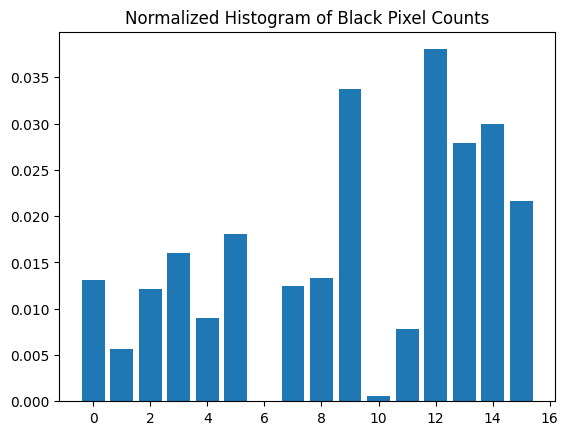

Processed image saved to: /content/drive/MyDrive/kursach/processed_data/person 2/person 2_sign_5.jpg
Processing: /content/drive/MyDrive/kursach/data/person 3/sign_1.jpg


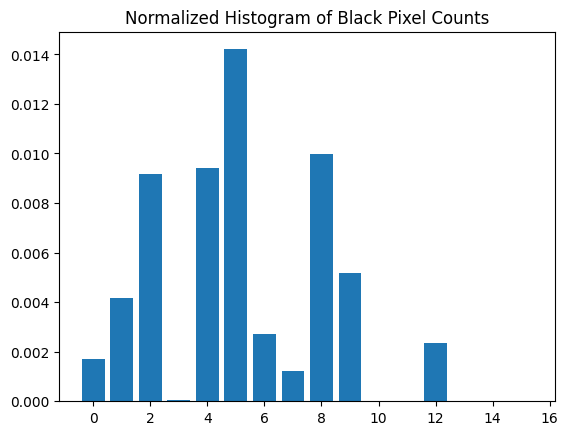

Processed image saved to: /content/drive/MyDrive/kursach/processed_data/person 3/person 3_sign_1.jpg
Processing: /content/drive/MyDrive/kursach/data/person 3/sign_3.jpg


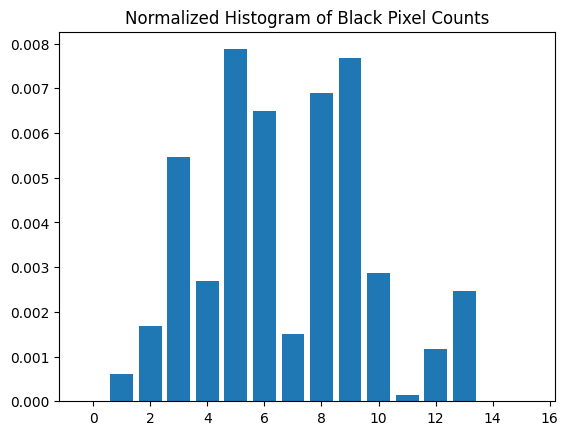

Processed image saved to: /content/drive/MyDrive/kursach/processed_data/person 3/person 3_sign_3.jpg
Processing: /content/drive/MyDrive/kursach/data/person 3/sign_4.jpg


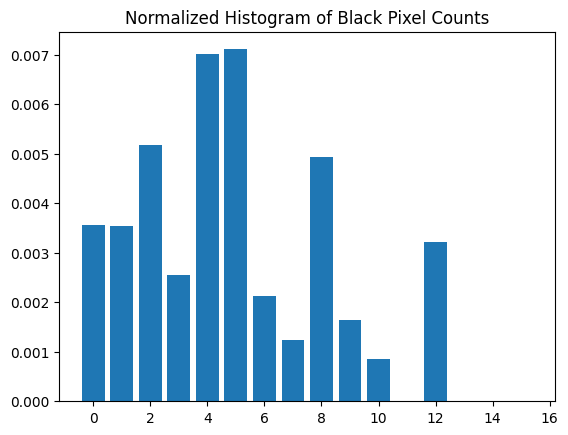

Processed image saved to: /content/drive/MyDrive/kursach/processed_data/person 3/person 3_sign_4.jpg
Processing: /content/drive/MyDrive/kursach/data/person 4/sign_1.jpg


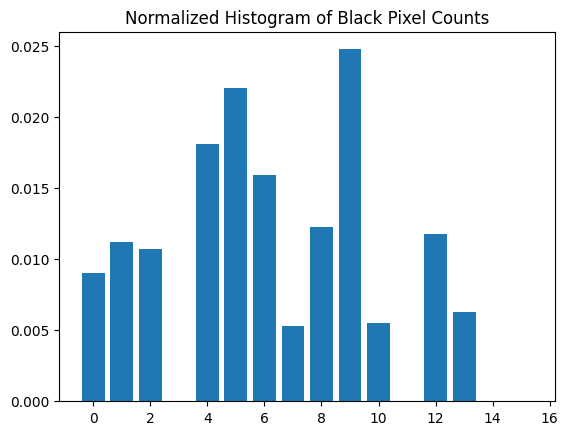

Processed image saved to: /content/drive/MyDrive/kursach/processed_data/person 4/person 4_sign_1.jpg
Processing: /content/drive/MyDrive/kursach/data/person 4/sign_4.jpg


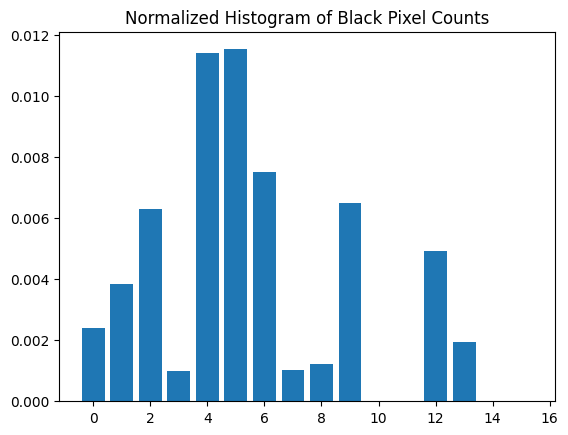

Processed image saved to: /content/drive/MyDrive/kursach/processed_data/person 4/person 4_sign_4.jpg
Processing: /content/drive/MyDrive/kursach/data/person 4/sign_5.jpg


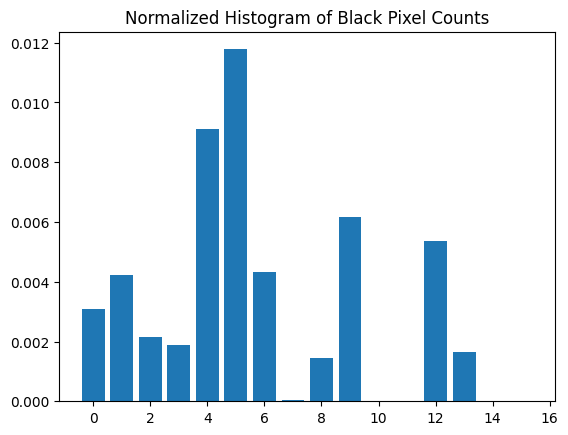

Processed image saved to: /content/drive/MyDrive/kursach/processed_data/person 4/person 4_sign_5.jpg
Processing: /content/drive/MyDrive/kursach/data/person 4/sign_2.jpg


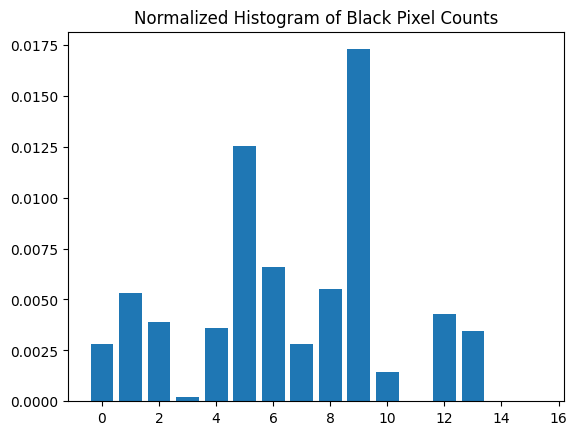

Processed image saved to: /content/drive/MyDrive/kursach/processed_data/person 4/person 4_sign_2.jpg
Processing: /content/drive/MyDrive/kursach/data/person 4/sign_3.jpg


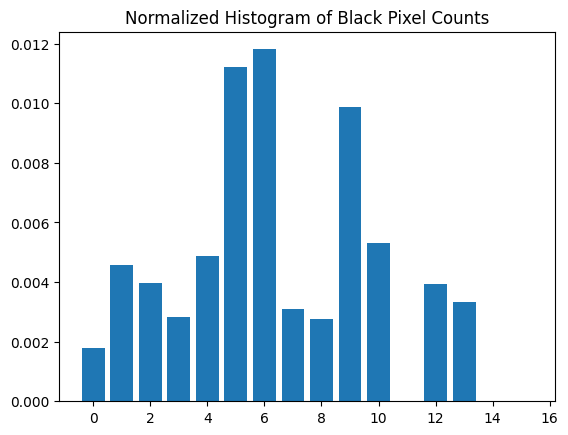

Processed image saved to: /content/drive/MyDrive/kursach/processed_data/person 4/person 4_sign_3.jpg
Processing: /content/drive/MyDrive/kursach/data/person 5/sign_1.jpg


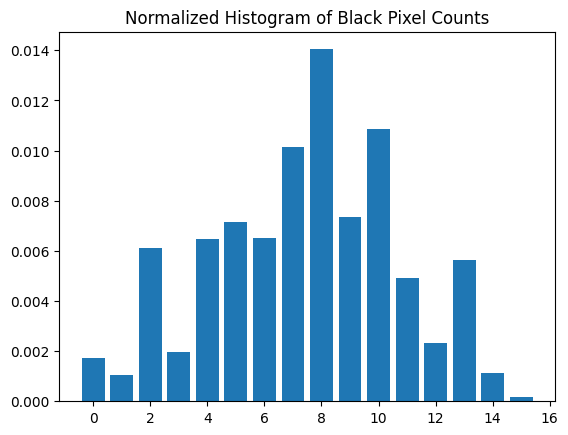

Processed image saved to: /content/drive/MyDrive/kursach/processed_data/person 5/person 5_sign_1.jpg
Processing: /content/drive/MyDrive/kursach/data/person 5/sign_2.jpg


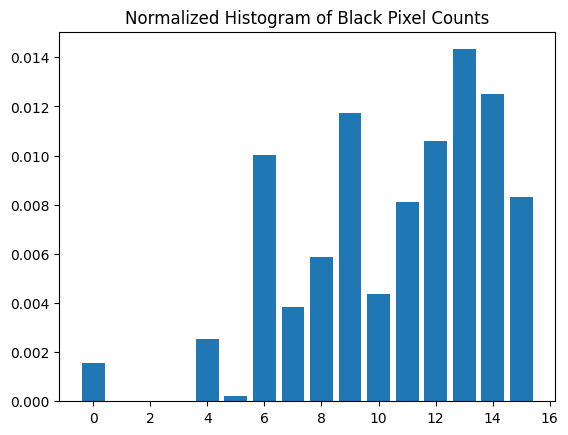

Processed image saved to: /content/drive/MyDrive/kursach/processed_data/person 5/person 5_sign_2.jpg
Processing: /content/drive/MyDrive/kursach/data/person 5/sign_3.jpg


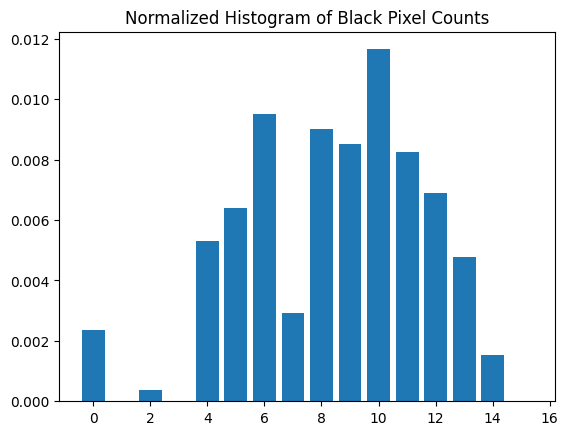

Processed image saved to: /content/drive/MyDrive/kursach/processed_data/person 5/person 5_sign_3.jpg
Processing: /content/drive/MyDrive/kursach/data/person 5/sign_4.jpg


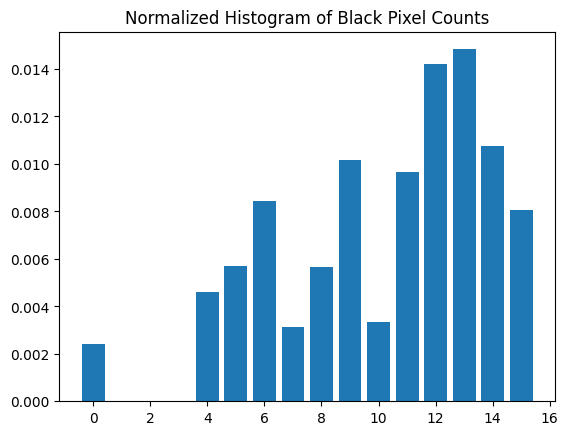

Processed image saved to: /content/drive/MyDrive/kursach/processed_data/person 5/person 5_sign_4.jpg
Processing: /content/drive/MyDrive/kursach/data/person 5/sign_5.jpg


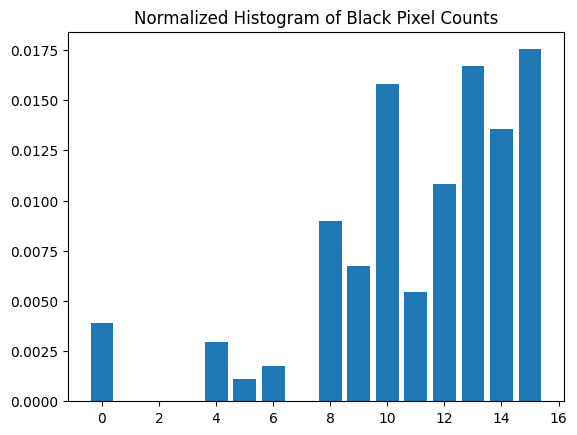

Processed image saved to: /content/drive/MyDrive/kursach/processed_data/person 5/person 5_sign_5.jpg
Processing: /content/drive/MyDrive/kursach/data/person 6/sign_1.jpg


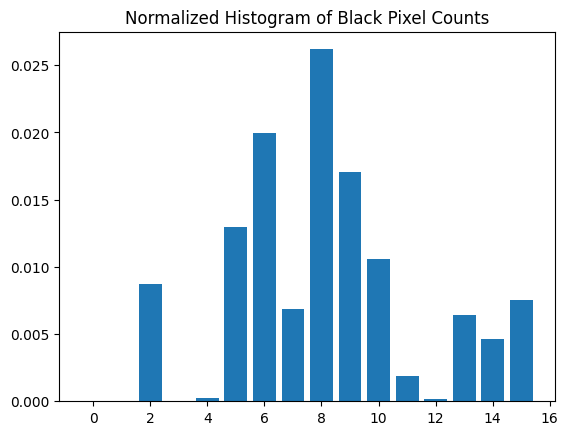

Processed image saved to: /content/drive/MyDrive/kursach/processed_data/person 6/person 6_sign_1.jpg
Processing: /content/drive/MyDrive/kursach/data/person 6/sign_2.jpg


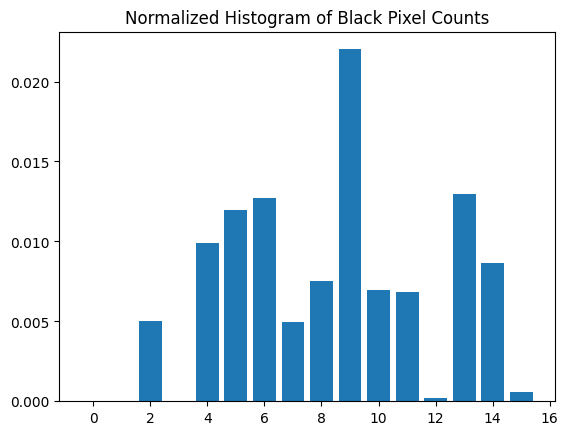

Processed image saved to: /content/drive/MyDrive/kursach/processed_data/person 6/person 6_sign_2.jpg
Processing: /content/drive/MyDrive/kursach/data/person 6/sign_3.jpg


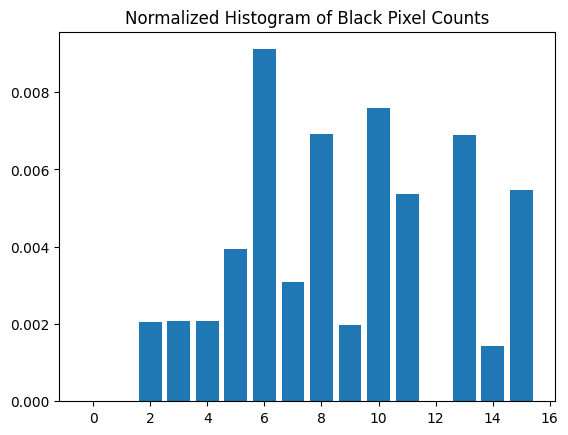

Processed image saved to: /content/drive/MyDrive/kursach/processed_data/person 6/person 6_sign_3.jpg
Processing: /content/drive/MyDrive/kursach/data/person 6/sign_5.jpg


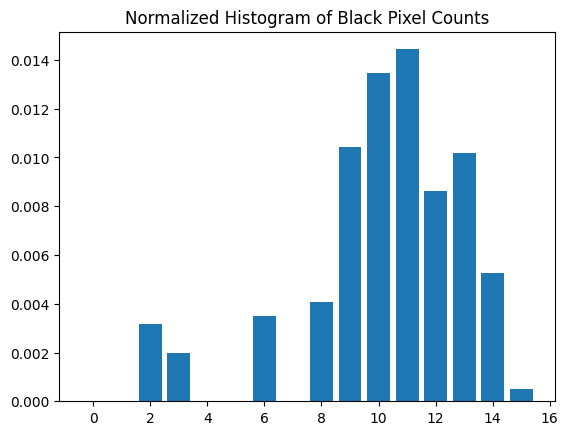

Processed image saved to: /content/drive/MyDrive/kursach/processed_data/person 6/person 6_sign_5.jpg
Processing: /content/drive/MyDrive/kursach/data/person 6/sign_4.jpg


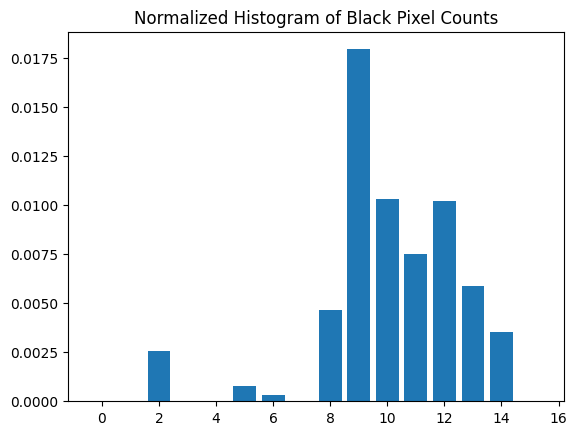

Processed image saved to: /content/drive/MyDrive/kursach/processed_data/person 6/person 6_sign_4.jpg
Processing: /content/drive/MyDrive/kursach/data/person 7/sign_2.jpg


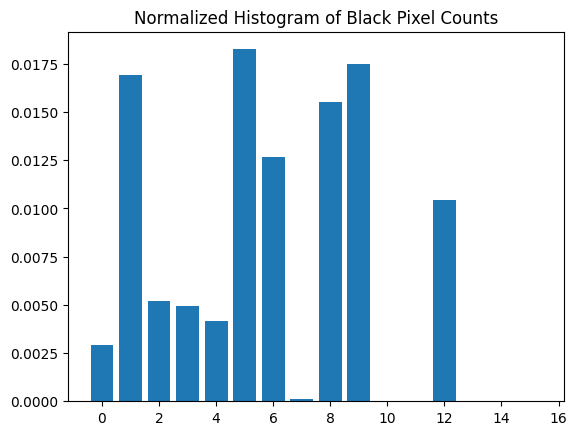

Processed image saved to: /content/drive/MyDrive/kursach/processed_data/person 7/person 7_sign_2.jpg
Processing: /content/drive/MyDrive/kursach/data/person 7/sign_4.jpg


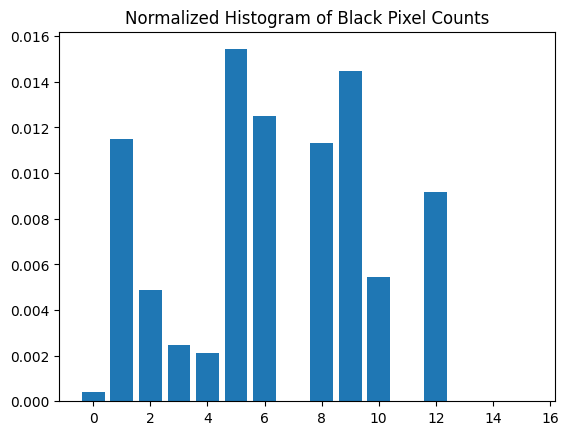

Processed image saved to: /content/drive/MyDrive/kursach/processed_data/person 7/person 7_sign_4.jpg
Processing: /content/drive/MyDrive/kursach/data/person 7/sign_3.jpg


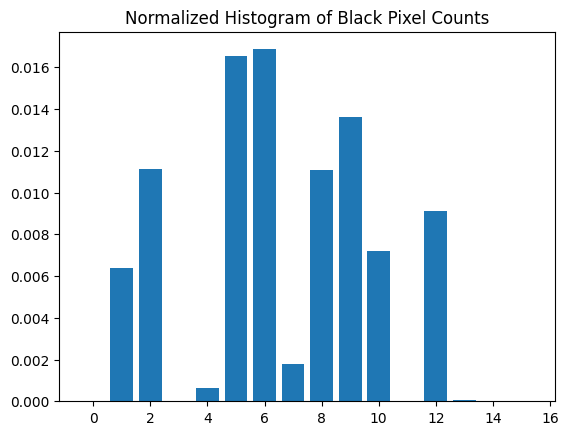

Processed image saved to: /content/drive/MyDrive/kursach/processed_data/person 7/person 7_sign_3.jpg
Processing: /content/drive/MyDrive/kursach/data/person 7/sign_5.jpg


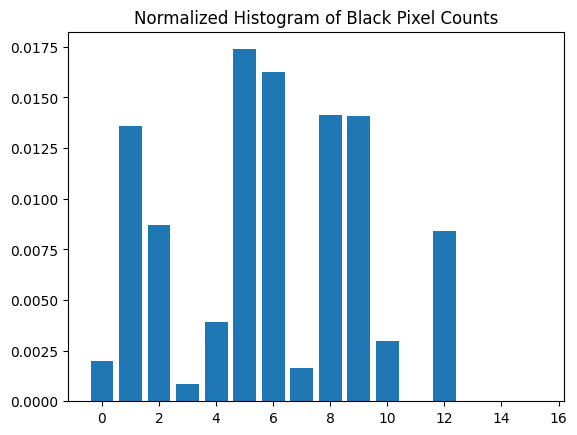

Processed image saved to: /content/drive/MyDrive/kursach/processed_data/person 7/person 7_sign_5.jpg
Processing: /content/drive/MyDrive/kursach/data/person 7/sign_`1.jpg


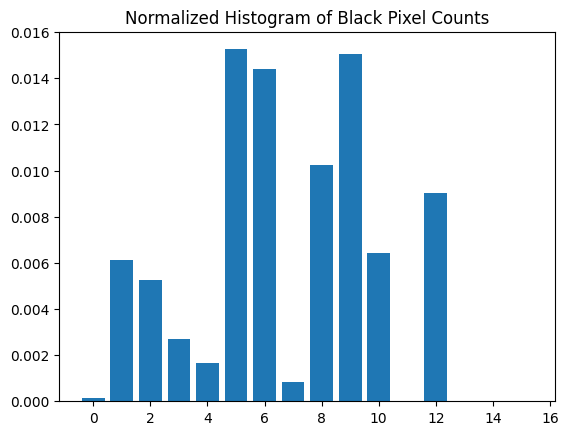

Processed image saved to: /content/drive/MyDrive/kursach/processed_data/person 7/person 7_sign_`1.jpg
Processing: /content/drive/MyDrive/kursach/data/person 8/sign_1.jpg


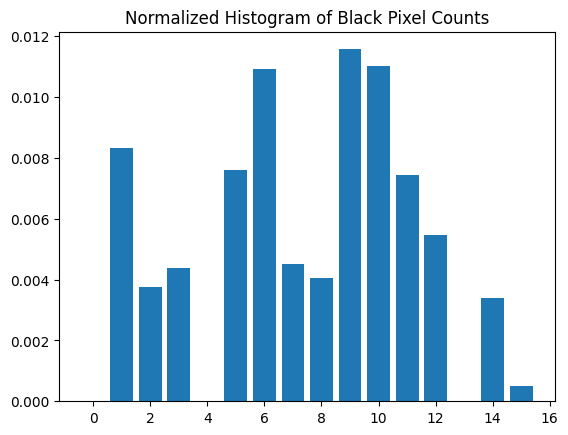

Processed image saved to: /content/drive/MyDrive/kursach/processed_data/person 8/person 8_sign_1.jpg
Processing: /content/drive/MyDrive/kursach/data/person 8/sign_2.jpg


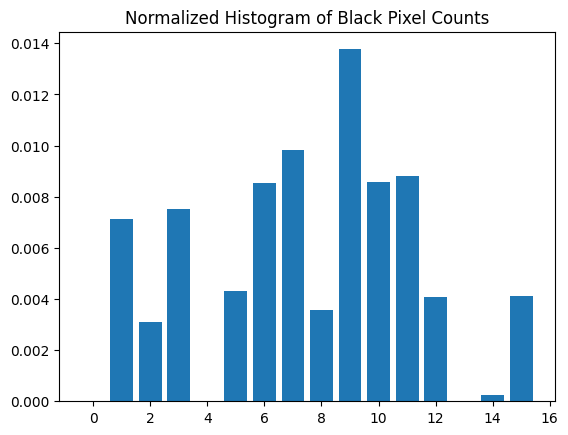

Processed image saved to: /content/drive/MyDrive/kursach/processed_data/person 8/person 8_sign_2.jpg
Processing: /content/drive/MyDrive/kursach/data/person 8/sign_3.jpg


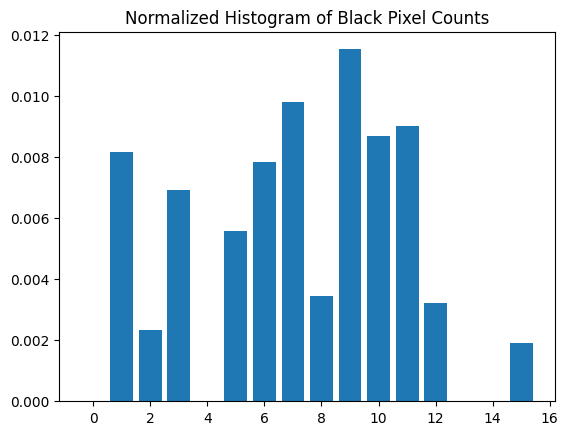

Processed image saved to: /content/drive/MyDrive/kursach/processed_data/person 8/person 8_sign_3.jpg
Processing: /content/drive/MyDrive/kursach/data/person 8/sign_5.jpg


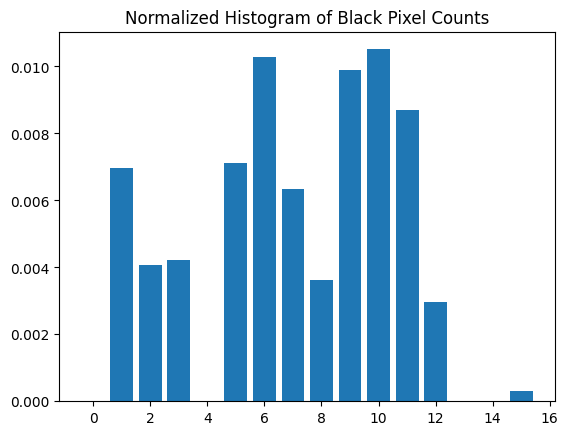

Processed image saved to: /content/drive/MyDrive/kursach/processed_data/person 8/person 8_sign_5.jpg
Processing: /content/drive/MyDrive/kursach/data/person 8/sign_4.jpg


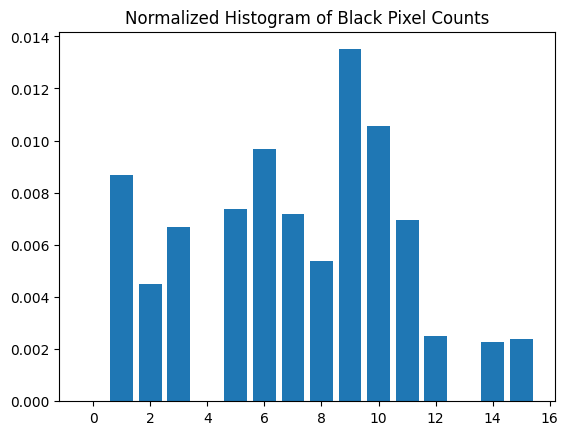

Processed image saved to: /content/drive/MyDrive/kursach/processed_data/person 8/person 8_sign_4.jpg
Processing: /content/drive/MyDrive/kursach/data/person 9/sign_1.jpg


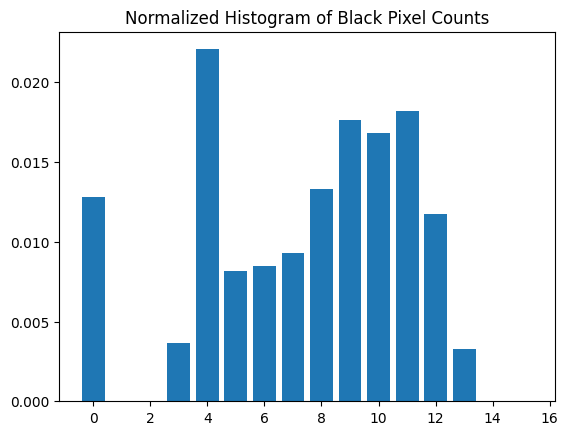

Processed image saved to: /content/drive/MyDrive/kursach/processed_data/person 9/person 9_sign_1.jpg
Processing: /content/drive/MyDrive/kursach/data/person 9/sign_2.jpg


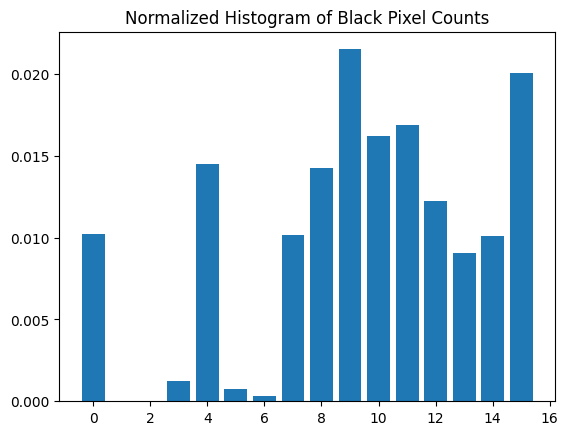

Processed image saved to: /content/drive/MyDrive/kursach/processed_data/person 9/person 9_sign_2.jpg
Processing: /content/drive/MyDrive/kursach/data/person 9/sign_3.jpg


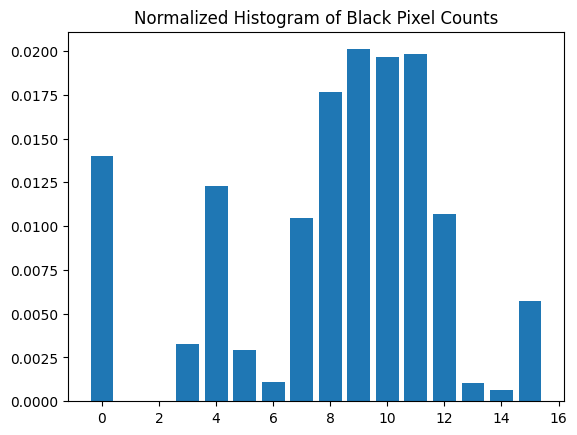

Processed image saved to: /content/drive/MyDrive/kursach/processed_data/person 9/person 9_sign_3.jpg
Processing: /content/drive/MyDrive/kursach/data/person 9/sign_4.jpg


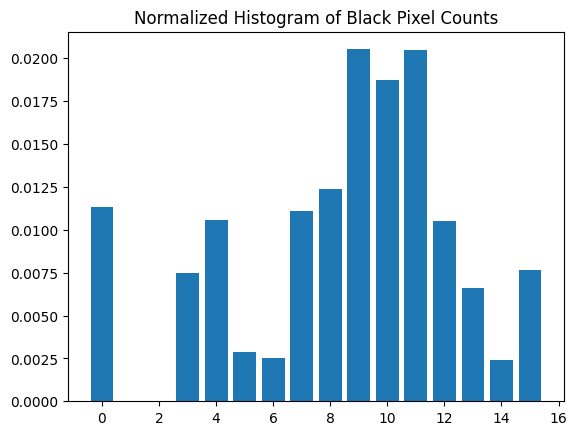

Processed image saved to: /content/drive/MyDrive/kursach/processed_data/person 9/person 9_sign_4.jpg
Processing: /content/drive/MyDrive/kursach/data/person 9/sign_5.jpg


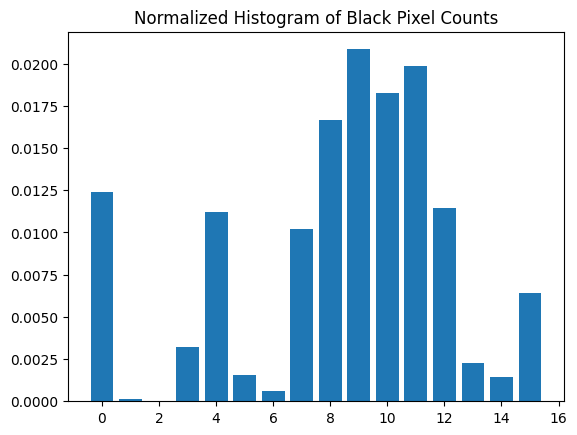

Processed image saved to: /content/drive/MyDrive/kursach/processed_data/person 9/person 9_sign_5.jpg


In [ ]:
for image_path in image_files:
    print(f"Processing: {image_path}")

    # 1. Загрузка исходного изображения
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # plt.imshow(image, cmap='gray')
    # plt.title('Original Image')
    # plt.show()

    # 2. Преобразование в бинарное изображение
    _, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    # plt.imshow(binary_image, cmap='gray')
    # plt.title('Binary Image (Otsu Thresholding)')
    # plt.show()

    # 3. Скелетизация
    # skeleton_image = cv2.ximgproc.thinning(binary_image)

    # # Показать скелетизированное изображение (опционально)
    # plt.imshow(skeleton_image, cmap='gray')
    # plt.title('Skeletonized Image')
    # plt.show()

    # 3. Извлечение Bounding Box
    labeled_image = label(binary_image)
    regions = regionprops(labeled_image)

    if len(regions) > 0:
        largest_region = max(regions, key=lambda r: r.area)
        minr, minc, maxr, maxc = largest_region.bbox
        cropped_image = binary_image[minr:maxr, minc:maxc]
    else:
        cropped_image = binary_image

    # plt.imshow(cropped_image, cmap='gray')
    # plt.title('Cropped Image (Bounding Box)')
    # plt.show()


    # 4. Изменение размера изображения
    resized_image = cv2.resize(cropped_image, (256, 256), interpolation=cv2.INTER_AREA)
    # plt.imshow(resized_image, cmap='gray')
    # plt.title('Resized Image')
    # plt.show()


    # 5. Деление на сетку и подсчет черных пикселей
    grid_size = (4, 4)
    h, w = resized_image.shape
    grid_h, grid_w = h // grid_size[0], w // grid_size[1]

    black_pixel_counts = []
    total_pixels = 0  # Суммарное количество пикселей в сетке

    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            grid = resized_image[i * grid_h:(i + 1) * grid_h, j * grid_w:(j + 1) * grid_w]

            black_pixel_count = np.sum(grid == 0)
            black_pixel_counts.append(black_pixel_count)
            total_pixels += grid.size  #

            # Вывод значений пикселей для диагностики
            # print(f"Grid [{i}, {j}] pixel values:\n{grid}")

            # plt.imshow(grid, cmap='gray')
            # plt.title(f'Grid [{i}, {j}]')
            # plt.show()

   # 6. Построение гистограммы и нормализация
    histogram = np.array(black_pixel_counts) / total_pixels
    plt.bar(range(len(histogram)), histogram)
    plt.title('Normalized Histogram of Black Pixel Counts')
    plt.show()


    # 7. Сохранение обработанного изображения с уникальным именем
    person_folder = os.path.basename(os.path.dirname(image_path))
    folder_index = os.path.basename(os.path.dirname(image_path)).split('_')[-1]  # Получаем номер папки
    file_name = f"{folder_index}_{os.path.basename(image_path)}"  # Добавляем номер папки к имени файла
    save_path = os.path.join(processed_data_folder, person_folder, file_name)
    os.makedirs(os.path.join(processed_data_folder, person_folder), exist_ok=True)
    cv2.imwrite(save_path, resized_image)
    print(f"Processed image saved to: {save_path}")

    # Сохранение признаков
    features.append([file_name] + histogram.tolist())

In [ ]:
# Создание DataFrame для признаков
columns = ["filename"] + [f"bin_{i}" for i in range(len(features[0]) - 1)]
features_df = pd.DataFrame(features, columns=columns)

# Сохранение признаков в CSV
features_df.to_csv(os.path.join(extract_path, 'features.csv'), index=False)
print(f"Features saved to: {os.path.join(extract_path, 'features.csv')}")

Features saved to: /content/drive/MyDrive/kursach/features.csv


In [ ]:
# Добавляем метки классов
features_df['label'] = features_df['filename'].apply(lambda x: os.path.basename(os.path.dirname(x)))
unique_labels = sorted(features_df['label'].unique())
label_to_idx = {label: idx for idx, label in enumerate(unique_labels)}
features_df['label'] = features_df['label'].map(label_to_idx)

features_df.to_csv(os.path.join(extract_path, 'features.csv'), index=False)
print(f"Features saved to: {os.path.join(extract_path, 'features.csv')}")

Features saved to: /content/drive/MyDrive/kursach/features.csv


In [ ]:
# Разделение данных на обучение и тест
train_features, test_features = train_test_split(features_df, test_size=0.2, random_state=42)


In [ ]:
def euclidean_distance(hist1, hist2):
    return np.sqrt(np.sum((hist1 - hist2) ** 2))

def calculate_distance_matrix(features_df):
    num_features = len(features_df)
    distance_matrix = np.zeros((num_features, num_features))

    for i in range(num_features):
        for j in range(num_features):
            hist1 = features_df.iloc[i, 1:-1].values.astype(np.float32)
            hist2 = features_df.iloc[j, 1:-1].values.astype(np.float32)
            distance_matrix[i, j] = euclidean_distance(hist1, hist2)

    return distance_matrix

test_distance_matrix = calculate_distance_matrix(test_features)

In [ ]:
# def display_distance_matrix(features_df, distance_matrix, title=""):
#     filenames = features_df['filename'].values
#     distance_df = pd.DataFrame(distance_matrix, index=filenames, columns=filenames)

#     print(title)
#     print(distance_df)

#     return distance_df

# train_distance_matrix = calculate_distance_matrix(train_features)
# train_distance_df = display_distance_matrix(train_features, train_distance_matrix,
#                                             title="тренировочных")
# test_distance_df = display_distance_matrix(test_features, test_distance_matrix,
#                                             title="тестовые")


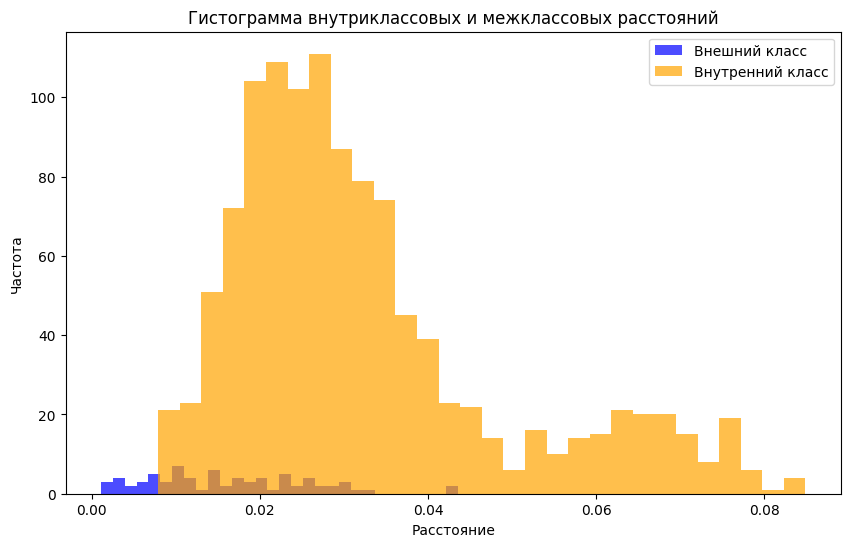

In [ ]:
def split_distances_by_class(features_df, distance_matrix):
    intra_class_distances = []
    inter_class_distances = []

    for i, label1 in enumerate(features_df['label']):
        for j, label2 in enumerate(features_df['label']):
            if i >= j:
                continue

            distance = distance_matrix[i, j]
            if label1 == label2:
                intra_class_distances.append(distance)
            else:
                inter_class_distances.append(distance)

    return intra_class_distances, inter_class_distances

features_path = '/content/drive/MyDrive/kursach/features.csv'
features_df = pd.read_csv(features_path)

features_df['label'] = features_df['filename'].apply(lambda x: x.split('_')[0])

train_features, test_features = train_test_split(features_df, test_size=0.2, random_state=42)

train_distance_matrix = calculate_distance_matrix(train_features)

intra_class_distances, inter_class_distances = split_distances_by_class(train_features, train_distance_matrix)

plt.figure(figsize=(10, 6))
plt.hist(intra_class_distances, bins=30, alpha=0.7, label='Внешний класс', color='blue')
plt.hist(inter_class_distances, bins=30, alpha=0.7, label='Внутренний класс', color='orange')
plt.xlabel('Расстояние')
plt.ylabel('Частота')
plt.legend()
plt.title('Гистограмма внутриклассовых и межклассовых расстояний')
plt.show()

In [ ]:
def assign_label_by_euclidean_distance(hist1, hist2, threshold):
    distance = euclidean_distance(hist1, hist2)
    return 1 if distance < threshold else 0

In [ ]:
def generate_pairs_with_similarity(features_df, threshold=0.03):
    pairs = []
    pair_labels = []
    image_paths = []

    for (idx1, row1), (idx2, row2) in itertools.combinations(features_df.iterrows(), 2):
        hist1 = row1.values[1:-1].astype(np.float32)
        hist2 = row2.values[1:-1].astype(np.float32)
        label = assign_label_by_euclidean_distance(hist1, hist2, threshold)

        person1 = os.path.basename(os.path.dirname(row1['filename']))
        person2 = os.path.basename(os.path.dirname(row2['filename']))
        path1 = os.path.join(processed_data_folder, person1, row1['filename'])
        path2 = os.path.join(processed_data_folder, person2, row2['filename'])

        hist_diff = np.abs(hist1 - hist2)
        pairs.append(hist_diff)
        pair_labels.append(label)
        image_paths.append((path1, path2))

    return pd.DataFrame(pairs), pair_labels, image_paths

train_pairs_df, train_pair_labels, train_image_paths = generate_pairs_with_similarity(train_features, threshold=0.03)
test_pairs_df, test_pair_labels, test_image_paths = generate_pairs_with_similarity(test_features, threshold=0.03)

print("Количество меток в тренировочных данных:")
print(pd.Series(train_pair_labels).value_counts())

print("Количество меток в тестовых данных:")
print(pd.Series(test_pair_labels).value_counts())

Количество меток в тренировочных данных:
1    720
0    505
Name: count, dtype: int64
Количество меток в тестовых данных:
0    43
1    35
Name: count, dtype: int64


In [ ]:
class SignaturePairDataset(Dataset):
    def __init__(self, pairs_df, labels, image_paths):
        self.pairs_df = pairs_df
        self.labels = labels
        self.image_paths = image_paths

    def __len__(self):
        return len(self.pairs_df)

    def __getitem__(self, idx):
        hist_diff = self.pairs_df.iloc[idx].values.astype(np.float32)
        label = self.labels[idx]
        image_pair = self.image_paths[idx]
        return torch.tensor(hist_diff), torch.tensor(label, dtype=torch.float32), image_pair


# DataLoader
train_dataset = SignaturePairDataset(train_pairs_df, train_pair_labels, train_image_paths)
test_dataset = SignaturePairDataset(test_pairs_df, test_pair_labels, test_image_paths)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [ ]:
class PairwiseSignatureClassifier(nn.Module):
    def __init__(self, input_size):
        super(PairwiseSignatureClassifier, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.fc(x)

input_size = train_pairs_df.shape[1]
model = PairwiseSignatureClassifier(input_size).to('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
# Обучение
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)

num_epochs = 300
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for features, labels, _ in train_loader:
        features, labels = features.to(device), labels.to(device)

        outputs = model(features).view(-1)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

Epoch [1/300], Loss: 0.7036
Epoch [2/300], Loss: 0.6998
Epoch [3/300], Loss: 0.6978
Epoch [4/300], Loss: 0.6940
Epoch [5/300], Loss: 0.6931
Epoch [6/300], Loss: 0.6907
Epoch [7/300], Loss: 0.6875
Epoch [8/300], Loss: 0.6851
Epoch [9/300], Loss: 0.6862
Epoch [10/300], Loss: 0.6836
Epoch [11/300], Loss: 0.6813
Epoch [12/300], Loss: 0.6815
Epoch [13/300], Loss: 0.6785
Epoch [14/300], Loss: 0.6796
Epoch [15/300], Loss: 0.6794
Epoch [16/300], Loss: 0.6763
Epoch [17/300], Loss: 0.6762
Epoch [18/300], Loss: 0.6743
Epoch [19/300], Loss: 0.6754
Epoch [20/300], Loss: 0.6720
Epoch [21/300], Loss: 0.6740
Epoch [22/300], Loss: 0.6734
Epoch [23/300], Loss: 0.6749
Epoch [24/300], Loss: 0.6730
Epoch [25/300], Loss: 0.6724
Epoch [26/300], Loss: 0.6721
Epoch [27/300], Loss: 0.6702
Epoch [28/300], Loss: 0.6715
Epoch [29/300], Loss: 0.6694
Epoch [30/300], Loss: 0.6679
Epoch [31/300], Loss: 0.6672
Epoch [32/300], Loss: 0.6693
Epoch [33/300], Loss: 0.6673
Epoch [34/300], Loss: 0.6632
Epoch [35/300], Loss: 0

Accuracy: 0.9103
Precision: 0.8500
Recall: 0.9714
F1 Score: 0.9067
True labels: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0]
Predictions: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0]


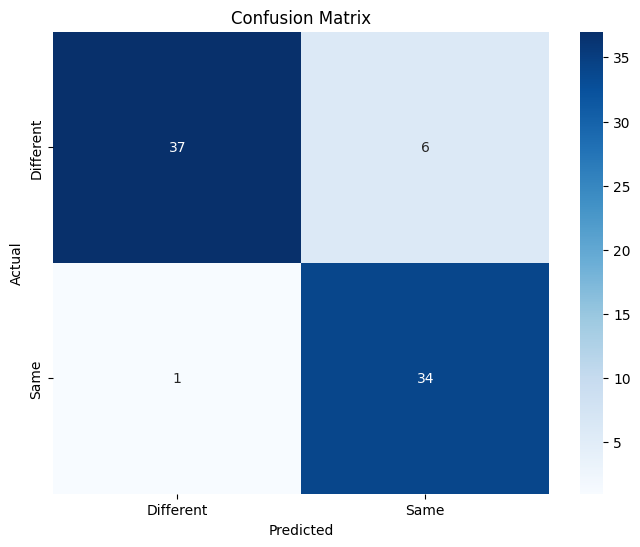

In [ ]:
import seaborn as sns
def evaluate_model(model, data_loader, device):
    model.eval()
    true_labels = []
    predictions = []

    with torch.no_grad():
        for features, labels, _ in data_loader:
            features, labels = features.to(device), labels.to(device)

            outputs = model(features).view(-1)
            predicted = (outputs >= 0.5).float()

            true_labels.extend(labels.cpu().numpy())
            predictions.extend(predicted.cpu().numpy())

    # Вычисление метрик
    accuracy = accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions)
    recall = recall_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions)

    # Матрица ошибок
    cm = confusion_matrix(true_labels, predictions)

    # Вывод результатов
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("True labels:", true_labels)
    print("Predictions:", predictions)

    # График матрицы ошибок
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Different', 'Same'], yticklabels=['Different', 'Same'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

evaluate_model(model, test_loader, device)